In [10]:
from docplex.mp.model import Model
m = Model(name='Production Planning')

A = m.continuous_var(name='TypeA')
B = m.continuous_var(name='TypeB')

ctLabor = m.add_constraint(20*A +40*B <= 2400, 'Labor')
ctMaxA = m.add_constraint(A <= 60, 'MaxA')
ctMaxB = m.add_constraint(B <= 50, 'MaxB')


m.maximize(20*A + 30*B)
m.print_information()

s=m.solve()
m.print_solution()

print(ctLabor.dual_value)
print(ctMaxA.dual_value)
print(ctMaxB.dual_value)

print(ctLabor.slack_value)
print(ctMaxA.slack_value)
print(ctMaxB.slack_value)

Model: Production Planning
 - number of variables: 2
   - binary=0, integer=0, continuous=2
 - number of constraints: 3
   - linear=3
 - parameters: defaults
 - objective: maximize
 - problem type is: LP
objective: 2100.000
  TypeA=60.000
  TypeB=30.000
0.75
5.0
0
0
0
20.0


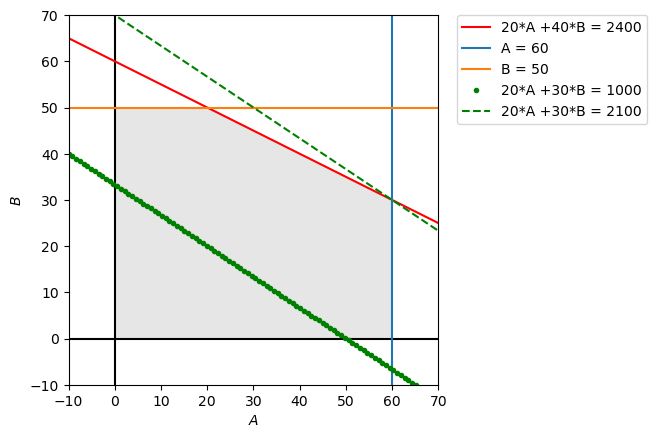

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.xlim(-10,70)
plt.ylim(-10,70)

A = np.linspace(-10,70,100)
B = (2400 - 20*A)/40
plt.plot(A, B, '-r', label='20*A +40*B = 2400')

plt.plot(60*np.ones_like(A), A, label='A = 60')
plt.plot(A, 50*np.ones_like(A), label='B = 50')

A = np.linspace(-10,70,100)
B = (1000 - 20*A)/30
plt.plot(A, B, '.g', label='20*A +30*B = 1000')

A = np.linspace(-10,70,100)
B = (2100 - 20*A)/30
plt.plot(A, B, '--g', label='20*A +30*B = 2100')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$A$')
plt.ylabel(r'$B$')

d = np.linspace(-10,70,300)
A,B = np.meshgrid(d,d)
plt.imshow( ((A>=0) & (B>=0) & (20*A +40*B <= 2400) & 
             (A <= 60)& (B <= 50)).astype(int) , 
            extent=(A.min(),A.max(),B.min(),B.max()),
           origin="lower", cmap="Greys", alpha = 0.1);




In [35]:
import cplex

my_obj      = [20, 30]
my_ub       = [60.0, 50.0] # cplex.infinity
my_colnames = ["A", "B"]
my_rhs      = [2400.0]
my_rownames = ["clabor"]
my_sense    = "L" # ["L", "G", "E"] Less, Greater, Equal

prob = cplex.Cplex()
prob.objective.set_sense(prob.objective.sense.maximize)

# since lower bounds are all 0.0 (the default), lb is omitted here
prob.variables.add(obj = my_obj, ub = my_ub, names = my_colnames)

rows = [[["A","B"],[20, 40]]]

prob.linear_constraints.add(lin_expr = rows, senses = my_sense,
                        rhs = my_rhs, names = my_rownames)

prob.solve()

print(prob.solution.get_values())

Version identifier: 22.1.0.0 | 2022-03-09 | 1a383f8ce
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
No LP presolve or aggregator reductions.
Presolve time = 0.00 sec. (0.00 ticks)

Iteration log . . .
Iteration:     1   Dual objective     =          2100.000000
[60.0, 30.0]
